In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [49]:
us_df = pd.read_csv("done_dataset.csv")
us_df.head()

,Unnamed: 0,Year,Month,CSUSHPISA,GDP_Capita,working_age_pop,Monthly_Supply_Houses,CPI,UNRATE,EMPrate,Construction Price Index,FEDFUNDS,Num_Households,median_income,HOUSES_SUBSIDARIES,old_age_pop,Date
0,0,2001,1,109.847,49911.00,180346200.0,3.8,175.6,4.2,73.96498,142.0,5.98,108209.0,68870.0,20.573,4.05,2001-01-01
1,1,2001,2,110.502,49961.44,180507000.0,3.7,176.0,4.2,73.87213,142.4,5.49,108209.0,68870.0,20.573,4.05,2001-02-01
2,2,2001,3,111.109,50054.56,180599100.0,3.8,176.1,4.3,73.90466,142.4,5.31,108209.0,68870.0,20.573,4.05,2001-03-01
3,3,2001,4,111.652,50105.00,180853100.0,3.9,176.4,4.4,73.55468,142.5,4.80,108209.0,68870.0,20.573,4.05,2001-04-01
4,4,2001,5,112.164,50018.94,181010700.0,4.0,177.3,4.3,73.39668,144.2,4.21,108209.0,68870.0,20.573,4.05,2001-05-01


In [51]:
us_df.drop(columns=["Year","Month"],inplace=True)

In [53]:
sum_stats = us_df.describe()
sum_stats

,Unnamed: 0,CSUSHPISA,GDP_Capita,working_age_pop,Monthly_Supply_Houses,CPI,UNRATE,EMPrate,Construction Price Index,FEDFUNDS,Num_Households,median_income,HOUSES_SUBSIDARIES,old_age_pop
count,275.000000,275.000000,275.000000,2.750000e+02,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,137.000000,180.175807,57195.183564,1.989667e+08,6.024727,228.545167,5.851273,69.861196,211.508029,1.589091,120649.985455,71656.945455,34.380055,6.027996
std,79.529869,49.666728,4808.617447,7.865233e+06,1.955464,33.446445,1.975347,2.154967,52.073728,1.752647,7080.774285,4897.971811,7.739736,1.816735
min,0.000000,109.847000,49774.000000,1.803462e+08,3.300000,175.600000,3.400000,60.168550,141.700000,0.050000,108209.000000,65740.000000,20.573000,3.908333
25%,68.500000,145.563000,53941.550000,1.936466e+08,4.500000,202.850000,4.400000,67.987260,181.300000,0.130000,114384.000000,68250.000000,28.604000,4.730000
50%,137.000000,170.052000,55650.920000,2.015024e+08,5.500000,228.807000,5.400000,70.639790,206.300000,1.010000,121084.000000,69310.000000,33.283000,5.475000
75%,205.500000,199.598500,60763.890000,2.056272e+08,7.200000,249.553000,6.700000,71.589410,230.000000,2.395000,127586.000000,75790.000000,38.859000,7.875000
max,274.000000,314.990000,67949.020000,2.092000e+08,12.200000,308.735000,14.800000,73.964980,353.015000,5.980000,131434.000000,81210.000000,53.573000,10.690000


In [55]:
corr_mat = us_df.corr(numeric_only=True)
corr_mat


,Unnamed: 0,CSUSHPISA,GDP_Capita,working_age_pop,Monthly_Supply_Houses,CPI,UNRATE,EMPrate,Construction Price Index,FEDFUNDS,Num_Households,median_income,HOUSES_SUBSIDARIES,old_age_pop
Unnamed: 0,1.000000,0.814244,0.950591,0.951873,0.189292,0.976327,-0.188983,-0.268101,0.907395,-0.219218,0.995558,0.769654,0.953032,0.204812
CSUSHPISA,0.814244,1.000000,0.933697,0.683122,0.292560,0.878624,-0.455560,0.164199,0.928505,0.220107,0.792419,0.849315,0.897840,0.309354
GDP_Capita,0.950591,0.933697,1.000000,0.860586,0.212919,0.962926,-0.410196,-0.004459,0.943995,0.022068,0.941358,0.858017,0.948951,0.236564
working_age_pop,0.951873,0.683122,0.860586,1.000000,0.283357,0.912314,-0.064451,-0.416185,0.807771,-0.290001,0.964032,0.601321,0.873026,0.304321
Monthly_Supply_Houses,0.189292,0.292560,0.212919,0.283357,1.000000,0.283443,0.044588,-0.021756,0.324822,0.186463,0.186900,0.073320,0.268430,0.932757
CPI,0.976327,0.878624,0.962926,0.912314,0.283443,1.000000,-0.224694,-0.187878,0.963707,-0.103189,0.966117,0.756207,0.978028,0.299716
UNRATE,-0.188983,-0.455560,-0.410196,-0.064451,0.044588,-0.224694,1.000000,-0.843986,-0.274841,-0.562237,-0.201967,-0.507661,-0.175294,0.065971
EMPrate,-0.268101,0.164199,-0.004459,-0.416185,-0.021756,-0.187878,-0.843986,1.000000,-0.078110,0.742898,-0.272976,0.235737,-0.192245,-0.043400
Construction Price Index,0.907395,0.928505,0.943995,0.807771,0.324822,0.963707,-0.274841,-0.078110,1.000000,-0.036368,0.888821,0.740753,0.951761,0.341112
FEDFUNDS,-0.219218,0.220107,0.022068,-0.290001,0.186463,-0.103189,-0.562237,0.742898,-0.036368,1.000000,-0.226059,0.193085,-0.095083,0.181677


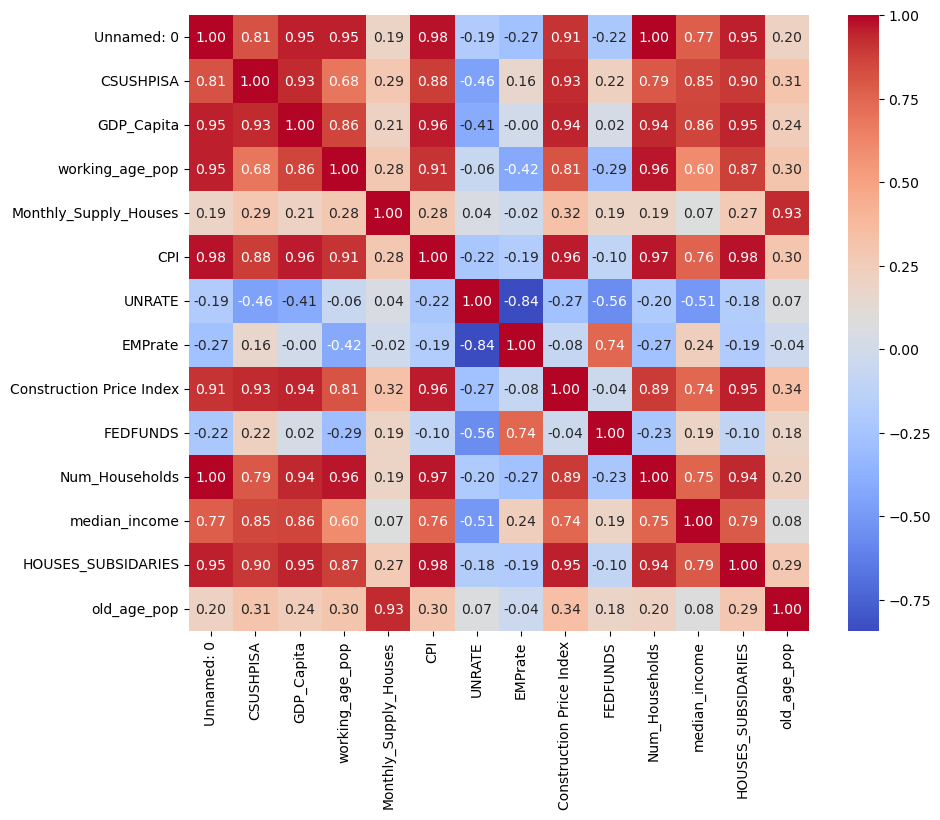

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

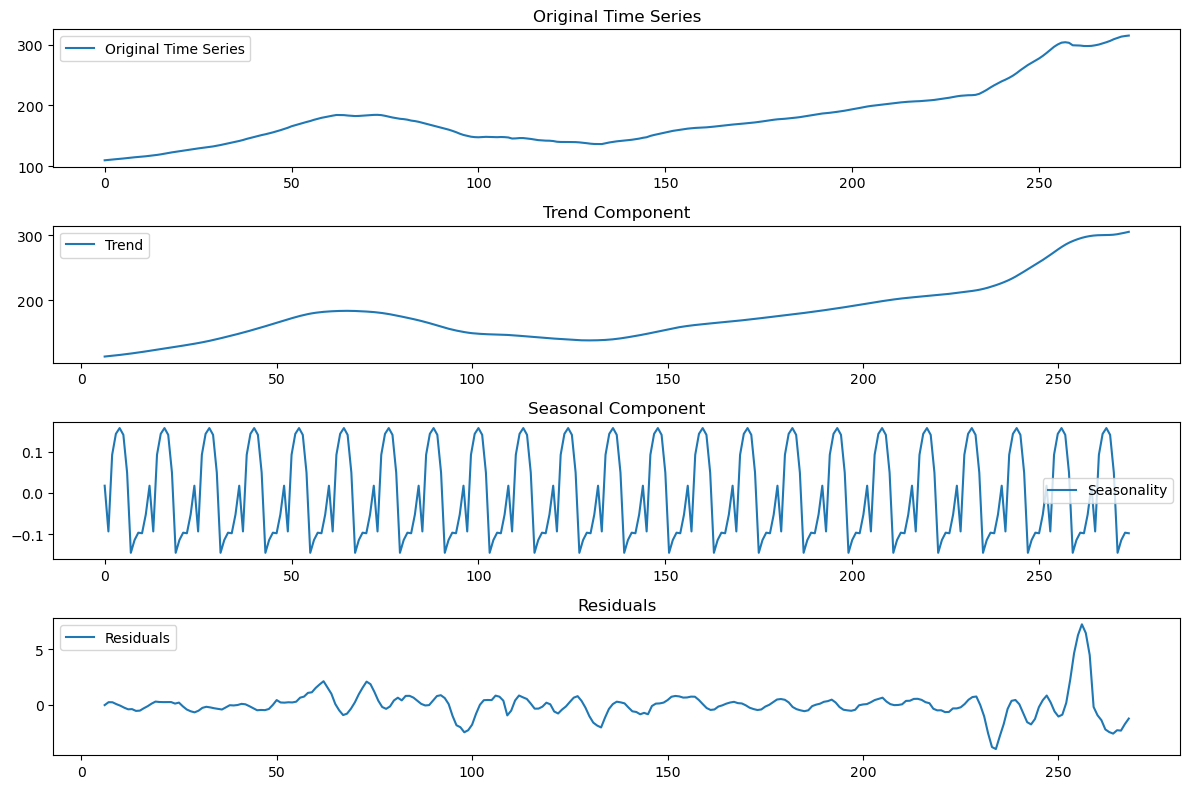

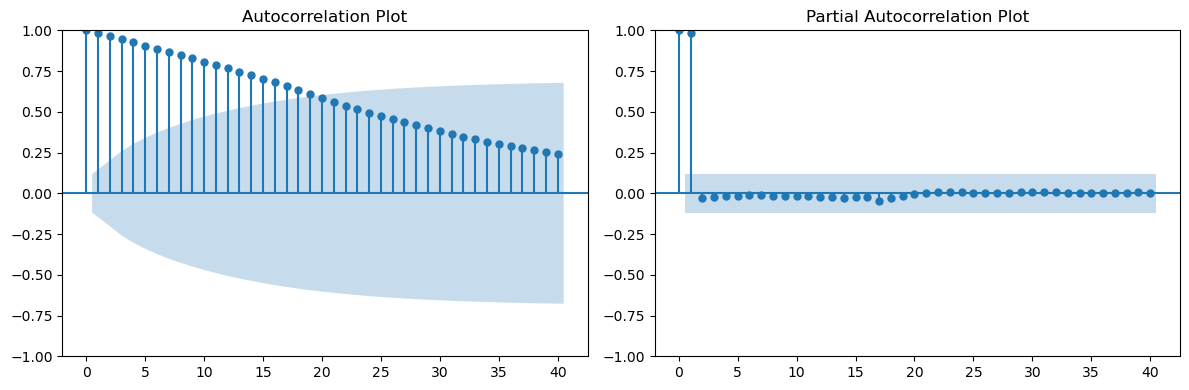

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


decomposition = seasonal_decompose(us_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plot_acf(us_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')


plt.subplot(1, 2, 2)
plot_pacf(us_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

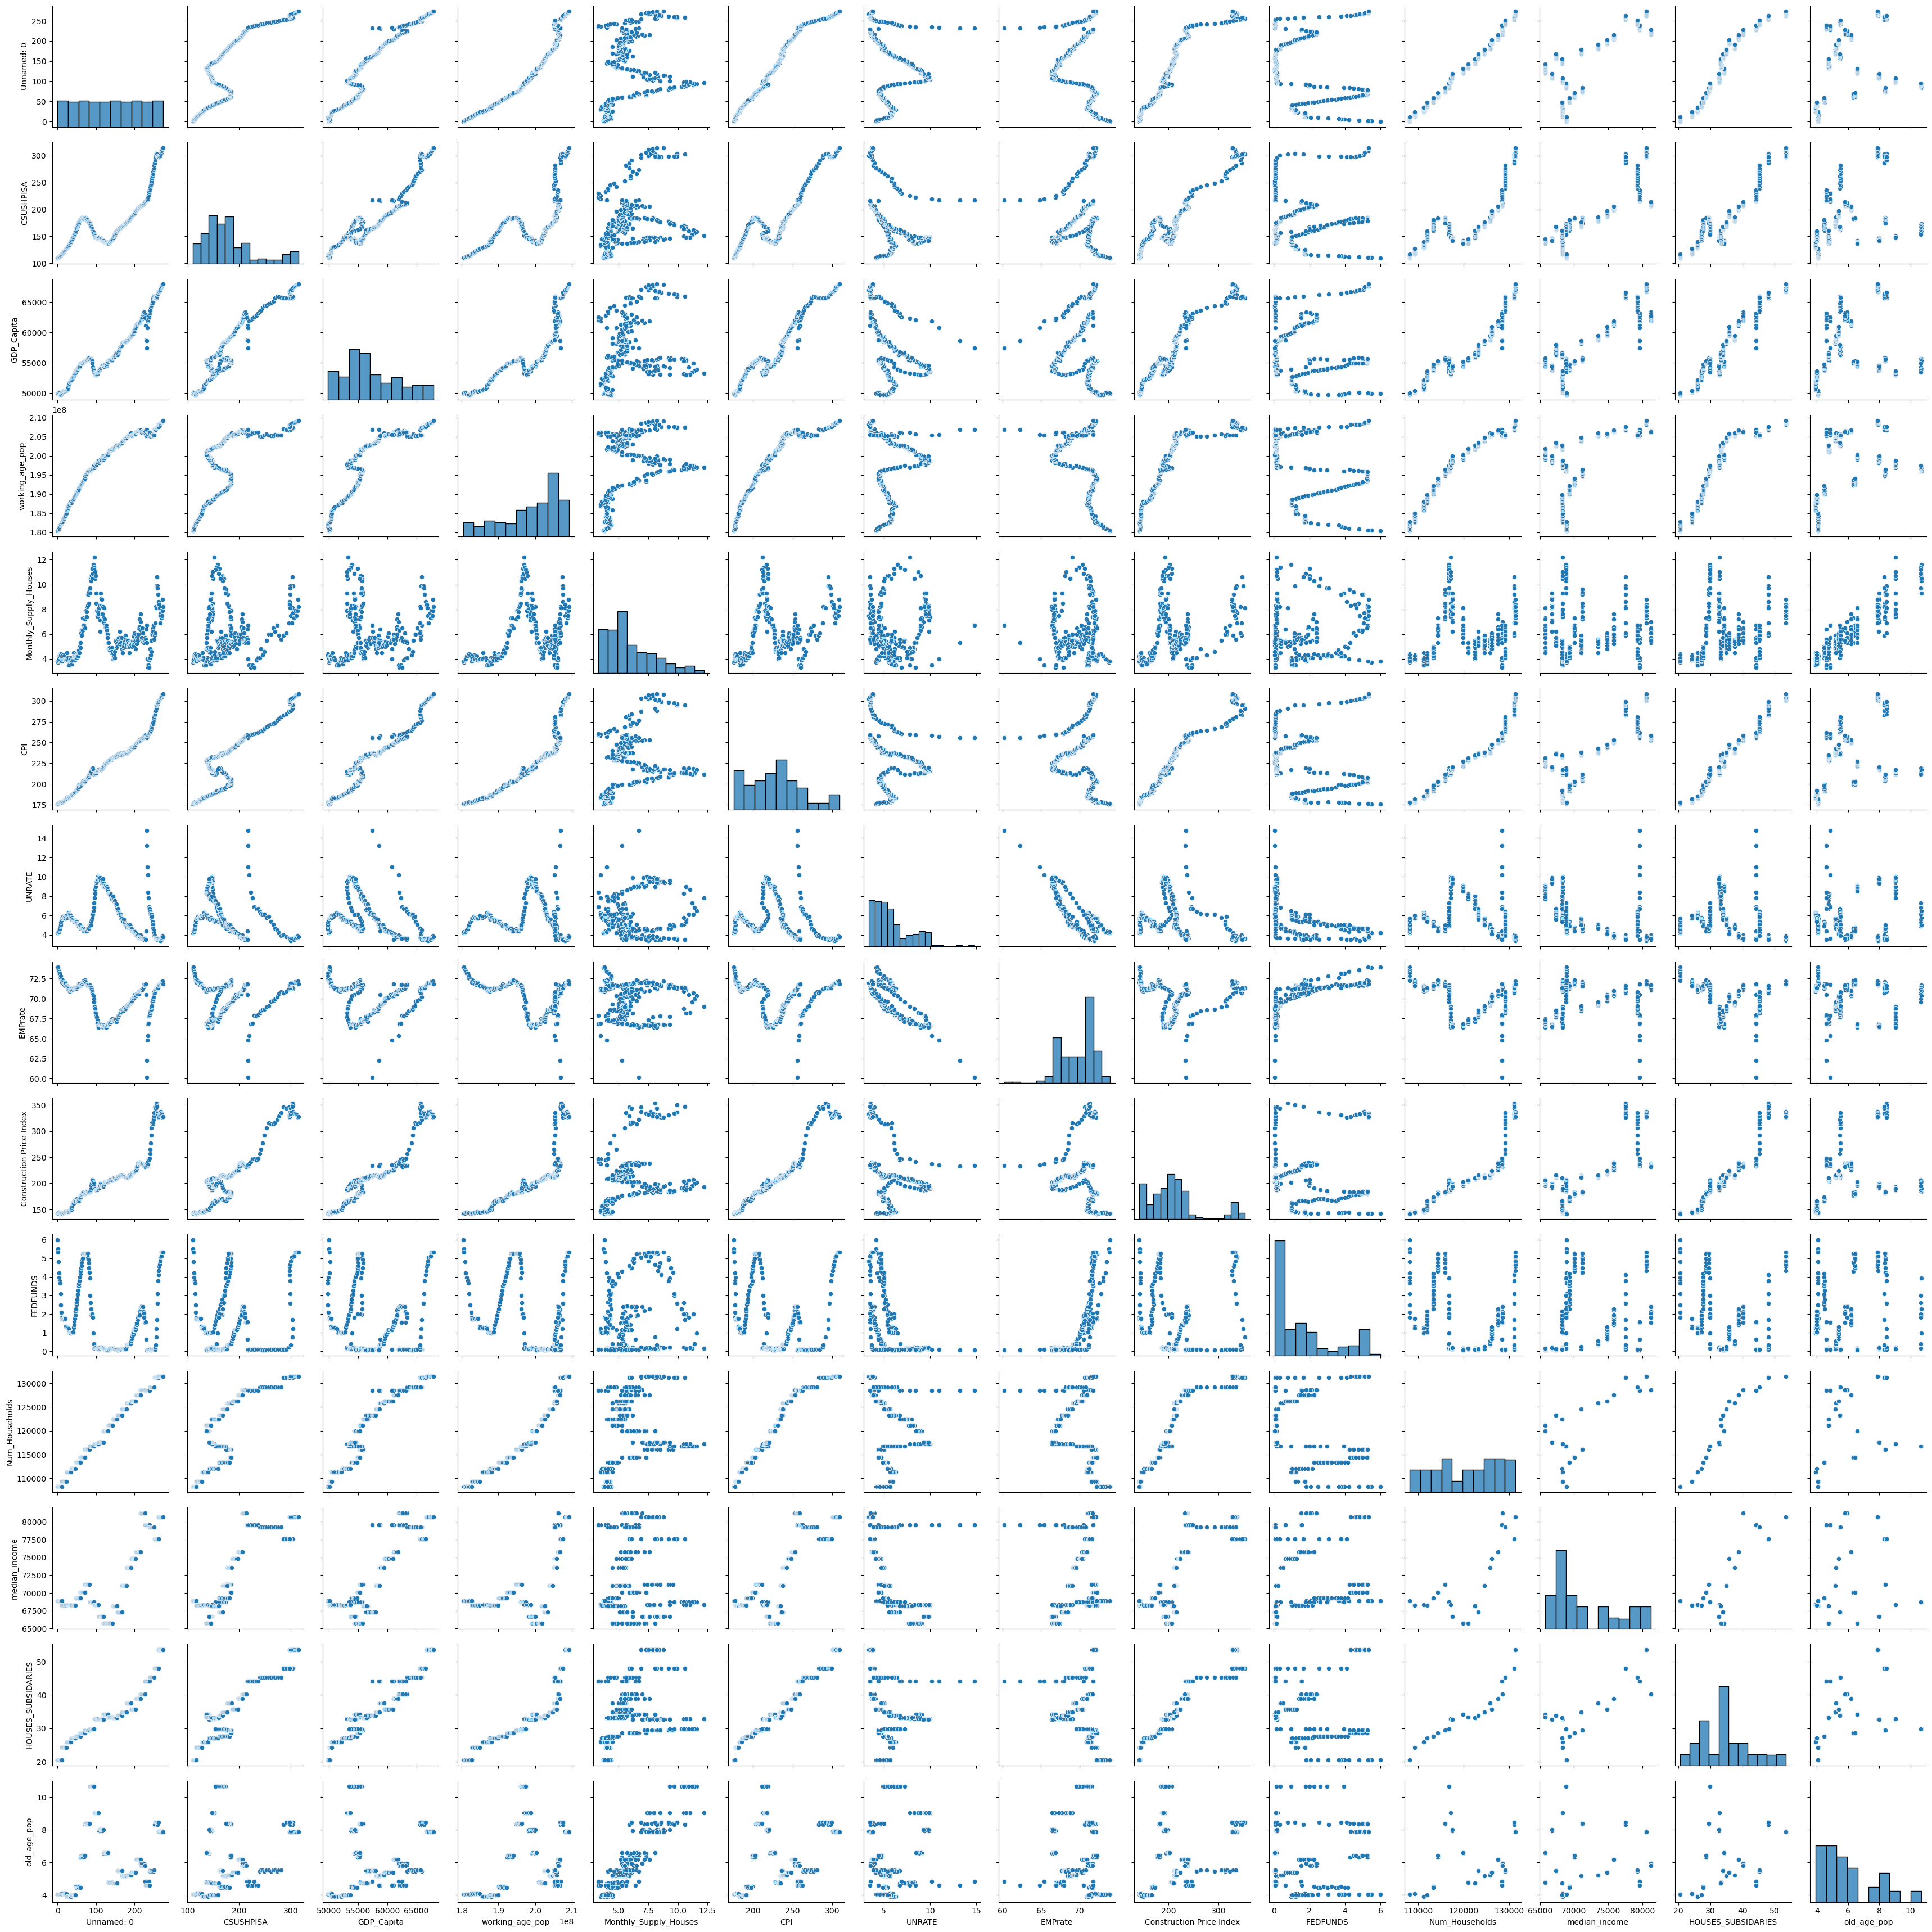

In [61]:
sns.pairplot(us_df)

In [66]:
us_df.columns

Index(['Unnamed: 0', 'CSUSHPISA', 'GDP_Capita', 'working_age_pop',
       'Monthly_Supply_Houses', 'CPI', 'UNRATE', 'EMPrate',
       'Construction Price Index', 'FEDFUNDS', 'Num_Households',
       'median_income', 'HOUSES_SUBSIDARIES', 'old_age_pop', 'Date'],
      dtype='object')

In [67]:
factors = ['Unnamed: 0', 'CSUSHPISA', 'GDP_Capita', 'working_age_pop',
       'Monthly_Supply_Houses', 'CPI', 'UNRATE', 'EMPrate',
       'Construction Price Index', 'FEDFUNDS', 'Num_Households',
       'median_income', 'HOUSES_SUBSIDARIES', 'old_age_pop', 'Date']

<Figure size 1300x800 with 0 Axes>

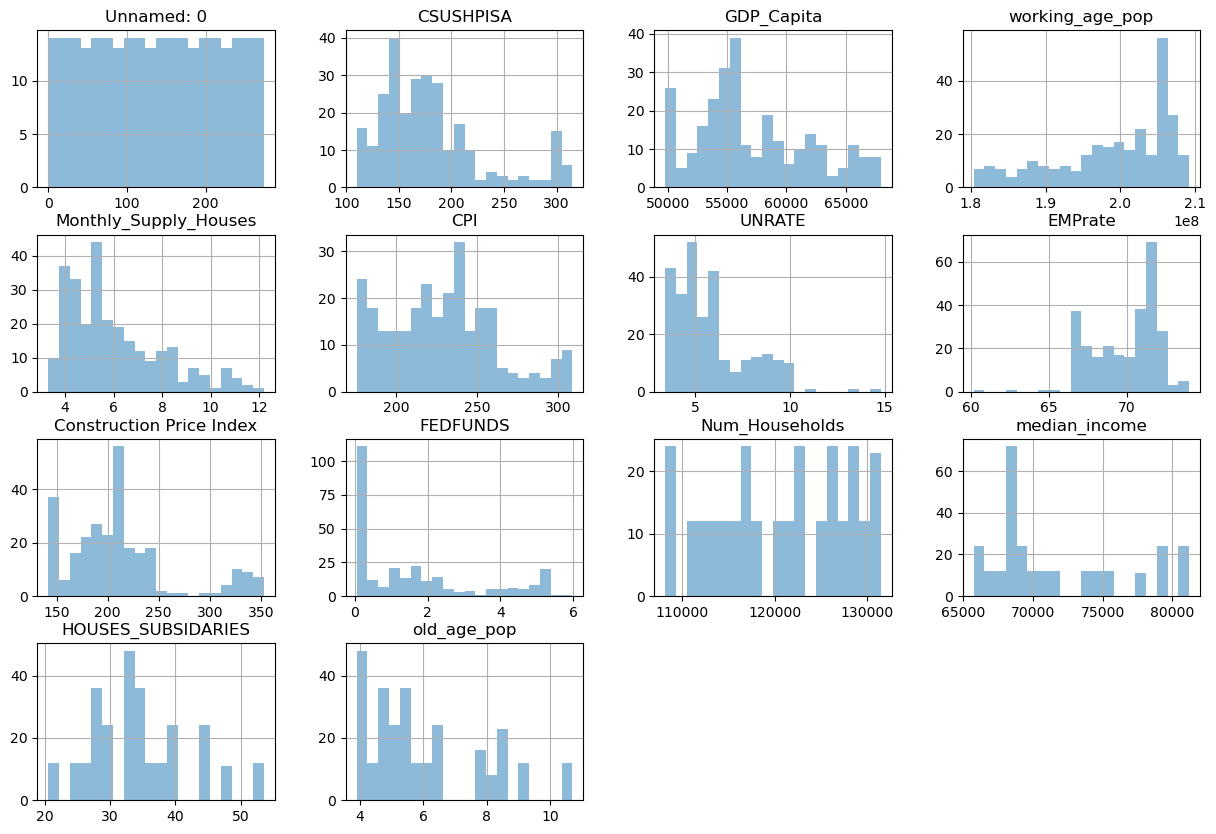

In [68]:
plt.figure(figsize=(13,8))
us_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.title('histogram and kernel density plot',y=1.02)
plt.show()

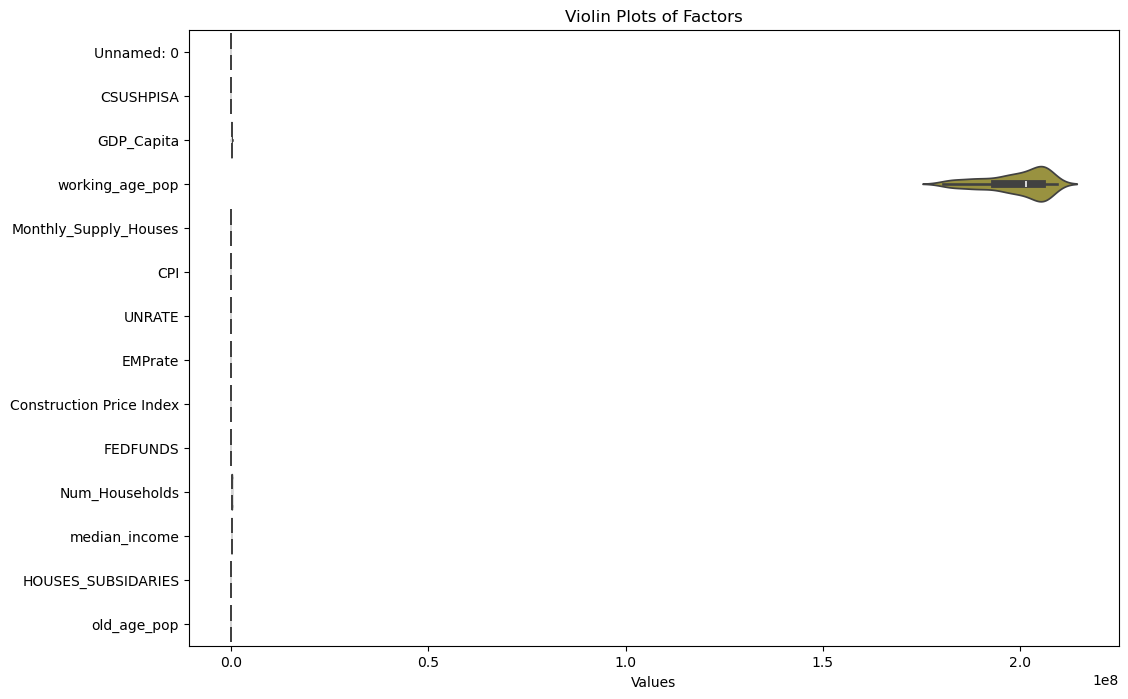

In [75]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

In [77]:
y = us_df.pop("CSUSHPISA")
X = us_df

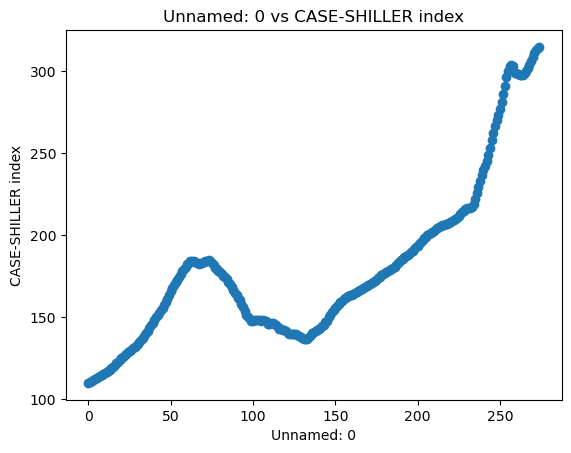

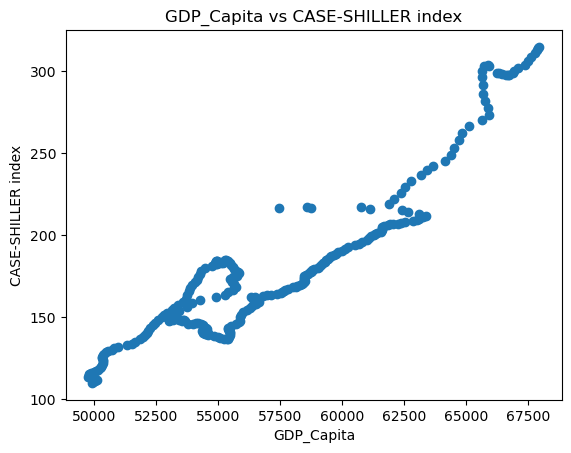

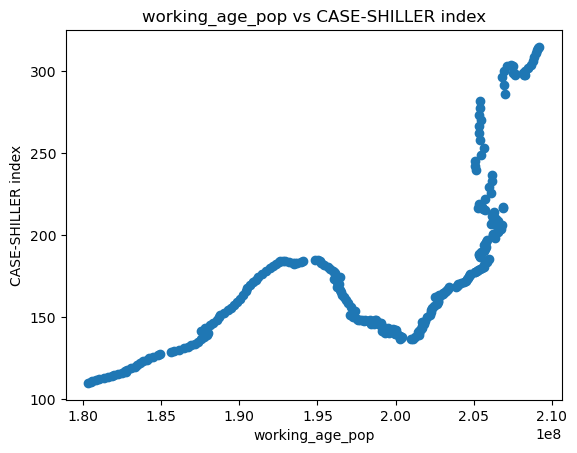

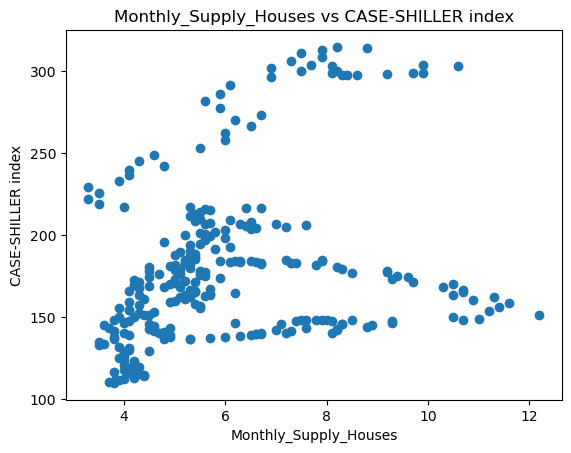

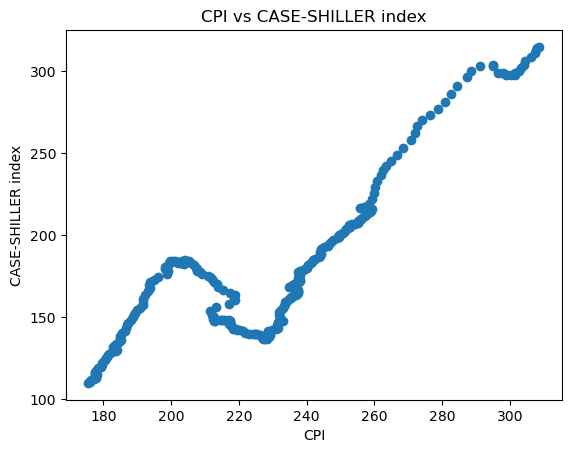

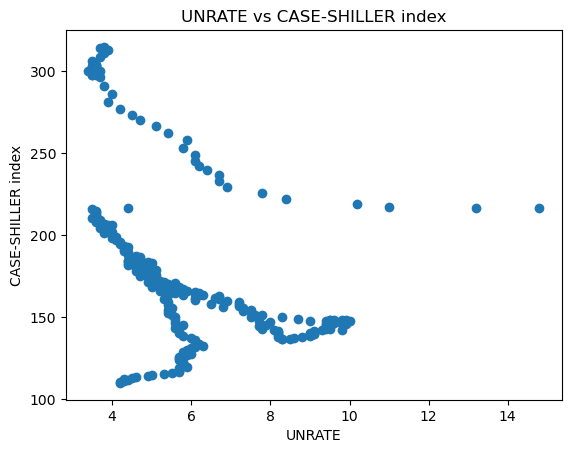

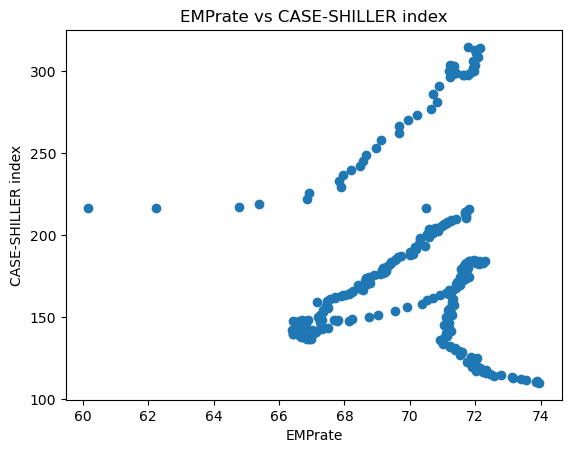

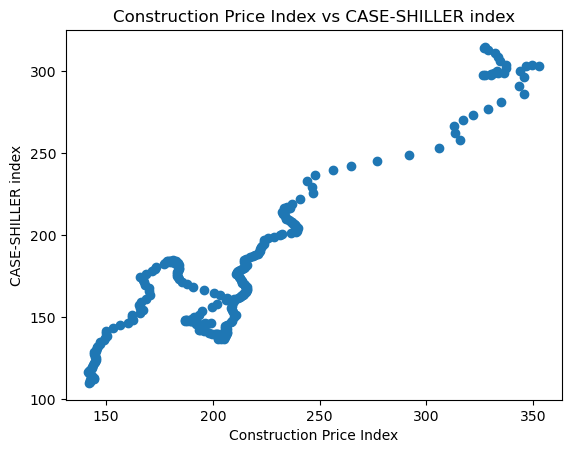

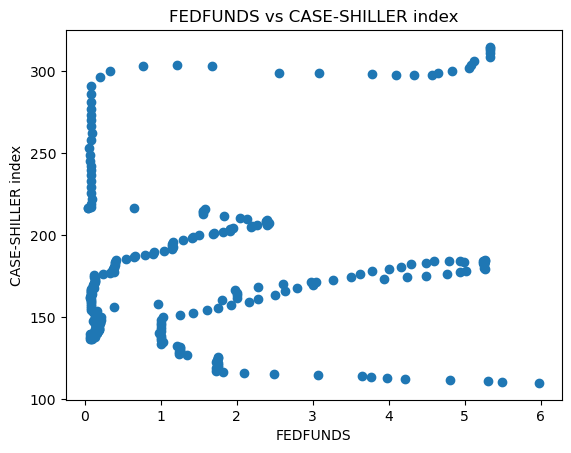

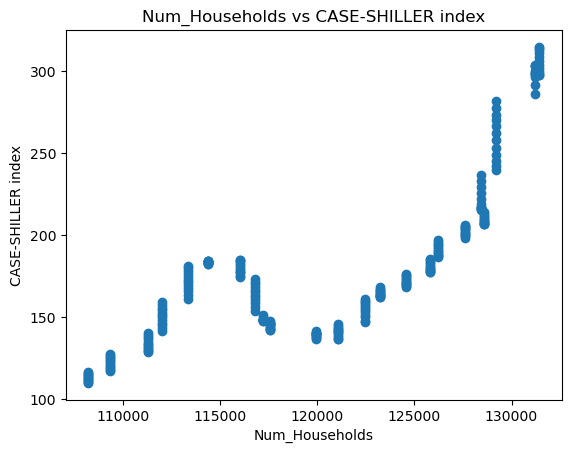

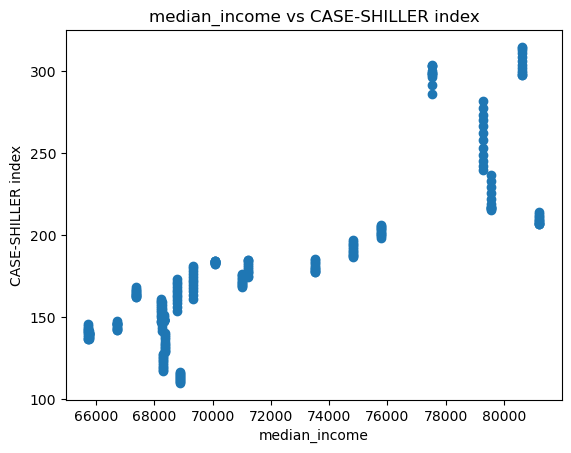

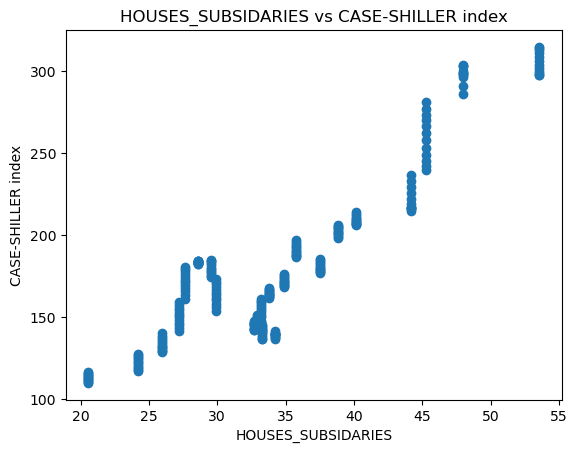

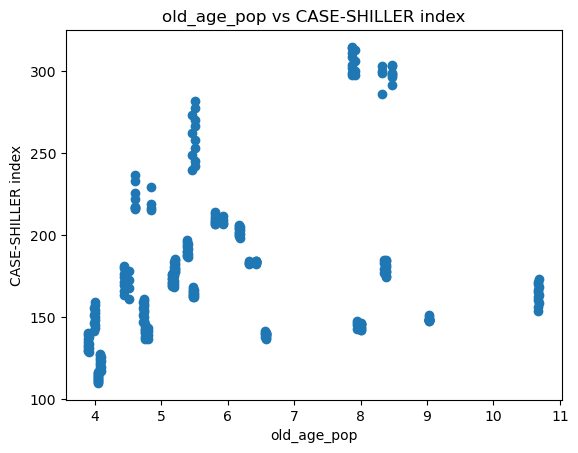

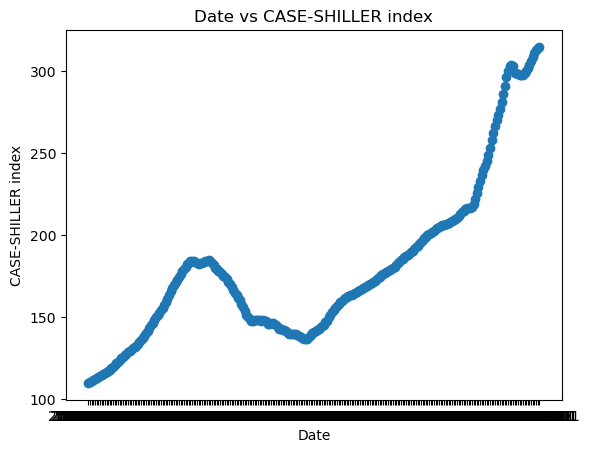

In [79]:
for feature in X.columns:
    plt.figure()
    plt.scatter(x=X[feature],y=y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"{feature} vs CASE-SHILLER index")


In [83]:

numeric_X = X.select_dtypes(include=['number'])
correlations = numeric_X.apply(lambda column: np.abs(column.corr(y)))
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)


GDP_Capita                  0.933697
Construction Price Index    0.928505
HOUSES_SUBSIDARIES          0.897840
CPI                         0.878624
median_income               0.849315
Unnamed: 0                  0.814244
Num_Households              0.792419
working_age_pop             0.683122
UNRATE                      0.455560
old_age_pop                 0.309354
Monthly_Supply_Houses       0.292560
FEDFUNDS                    0.220107
EMPrate                     0.164199
dtype: float64


In [93]:
pip install xgboost


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor


In [102]:
multi_cols = ["working_age_pop", "Num_Households", "UNRATE", "EMPrate", "FEDFUNDS"]
us_df.drop(columns=multi_cols,inplace=True)
X = us_df

In [104]:
X

,Unnamed: 0,GDP_Capita,Monthly_Supply_Houses,CPI,Construction Price Index,median_income,HOUSES_SUBSIDARIES,old_age_pop,Date
0,0,49911.00,3.8,175.600,142.000,68870.0,20.573,4.050,2001-01-01
1,1,49961.44,3.7,176.000,142.400,68870.0,20.573,4.050,2001-02-01
2,2,50054.56,3.8,176.100,142.400,68870.0,20.573,4.050,2001-03-01
3,3,50105.00,3.9,176.400,142.500,68870.0,20.573,4.050,2001-04-01
4,4,50018.94,4.0,177.300,144.200,68870.0,20.573,4.050,2001-05-01
...,...,...,...,...,...,...,...,...,...
270,270,67592.34,7.9,306.138,333.794,80610.0,53.573,7.875,2023-08-01
271,271,67764.66,7.5,307.374,332.098,80610.0,53.573,7.875,2023-09-01
272,272,67858.00,7.9,307.653,328.743,80610.0,53.573,7.910,2023-10-01
273,273,67889.98,8.8,308.087,326.844,80610.0,53.573,7.875,2023-11-01


In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [116]:
X_train = X_train.drop(columns=['Date'])  # or the actual column name
X_test = X_test.drop(columns=['Date'])


In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [120]:
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 106.27140471575142
R-squared: 0.9510814355370836
Coefficients:
Unnamed: 0: -47.2236704577136
GDP_Capita: 52.794131353143676
Monthly_Supply_Houses: 3.77164409311926
CPI: -6.365731828792963
Construction Price Index: 20.583611867600194
median_income: 5.295277557751541
HOUSES_SUBSIDARIES: 22.165627804428475
old_age_pop: -2.4393717528708563
Intercept: 180.7441999999999

Model: ElasticNet
Mean Squared Error: 224.52547207269825
R-squared: 0.8966470443433682
Coefficients:
Unnamed: 0: 0.9826473582854485
GDP_Capita: 9.419053108781487
Monthly_Supply_Houses: 1.662562686535226
CPI: 5.203748876725982
Construction Price Index: 10.639791654298312
median_income: 10.297211437298511
HOUSES_SUBSIDARIES: 7.026662760859644
old_age_pop: 1.7716317817585683
Intercept: 180.74419999999995

Model: Random Forest
Mean Squared Error: 15.362800052418304
R-squared: 0.9929282375940616
Feature Importance Analysis:
Unnamed: 0: 0.33512415085772773
GDP_Capita: 0.0487424732874960

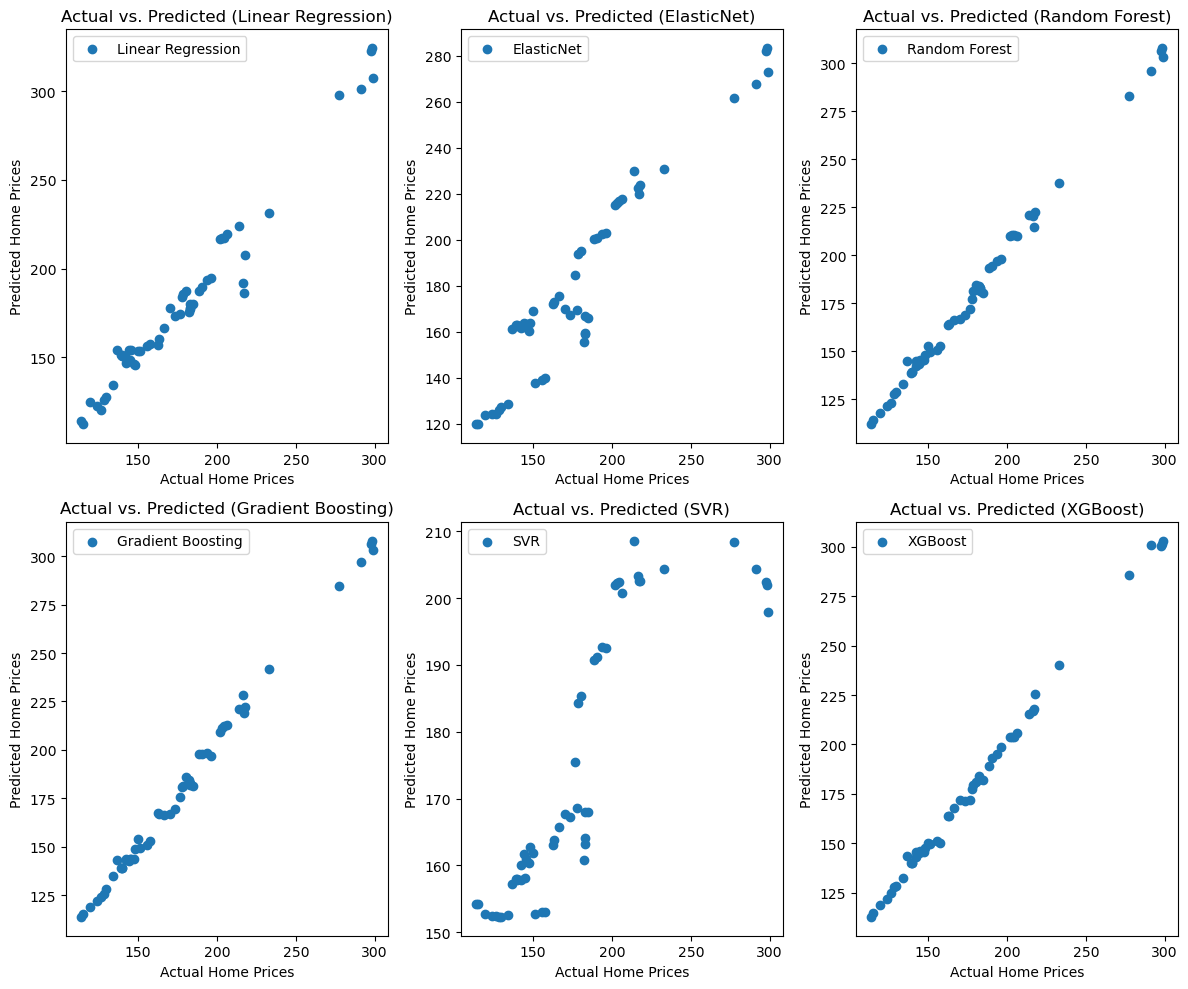


Best Model: XGBRegressor with MSE: 9.792203690757665


In [122]:
best_model = None
best_mse = float('inf')


fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()


for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

  
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
       
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

  
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()


plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

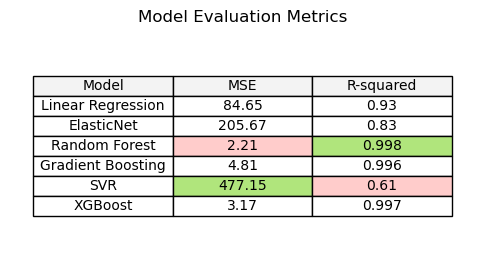

In [124]:
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2) 

min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()